Handwritten Digit Classification 
-----------------------------------------------------------------------------------------------------------------------------

In [3]:
# ! pip install tensorflow


In [4]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import pandas as pd
import numpy as np

In [5]:
#load the handwriitten digits dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [6]:
#check unique values in the y
classes = np.unique(y_train)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

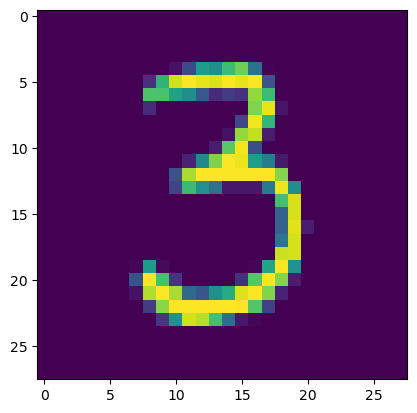

In [7]:
#to  see the image - convert the pixels intoo the image 
import matplotlib.pyplot as plt
plt.imshow(X_train[50])

#so it is important to keep all the pixel values at the same range like some values are very low like 0 , 1 and some are too hight like 198 ,245,etc so we need to make them at a similar range so we will divide  all the values with the max value in this then we will get all the values form 0 to 1 between

In [8]:
X_train.max()

np.uint8(255)

In [9]:
#Normalize the data 
X_train= X_train/255
X_test = X_test/255

In [10]:
#again check the X_train
X_train.max()

np.float64(1.0)

In [11]:
X_train.shape

(60000, 28, 28)

Neural Network Building 
-----------------------------------------------------------------------------------------------------------------------------

Because in our dataset we have 28x28 shape and we can't directly input them in the input layer so we make the flatten input layer
first to make it input in the first input layer

In [12]:
#build model
model= Sequential()
model.add(Flatten(input_shape=(28,28))) #input layer 
model.add(Dense(128,activation='relu')) #first hidden layer
model.add(Dense(30,activation='relu'))
model.add(Dense(10,activation= 'softmax')) #output layer - because in output we have 10 classes

D:\miniconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
#check the parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           3,870 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             310 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,660 (408.83 KB)

 Trainable params: 104,660 (408.83 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
#before compiling and fitting the data we will check if the output classes are balanced or need to be balanced 
y_df = pd.Series(y_train)
y_df.value_counts(normalize = True)

1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
Name: proportion, dtype: float64

In [15]:
#compile the model 
model.compile(loss = 'sparse_categorical_crossentropy',optimizer= 'Adam',metrics=['accuracy'])

In [16]:
#fit the data 
history=model.fit(X_train,y_train,epochs= 20,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9169 - loss: 0.2824 - val_accuracy: 0.9578 - val_loss: 0.1402
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9653 - loss: 0.1138 - val_accuracy: 0.9634 - val_loss: 0.1182
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9761 - loss: 0.0796 - val_accuracy: 0.9722 - val_loss: 0.0912
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9812 - loss: 0.0590 - val_accuracy: 0.9743 - val_loss: 0.0892
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9864 - loss: 0.0440 - val_accuracy: 0.9768 - val_loss: 0.0837
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9874 - loss: 0.0372 - val_accuracy: 0.9753 - val_loss: 0.0857
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9913 - loss: 0.0284 - val_accuracy: 0.9736 - val_loss: 0.1073
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9917 - loss: 0.0

In [17]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


#because softmax gives the probabilites  from 0 to 1 for each class in output target like :
here we have 10 classes in output target  - softmax gives us 10 probabilites for each class and the highest probability is the predicted class

In [18]:
#convert the probability into the required class
y_pred= y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [19]:
#Evaluate the model prediction 
from sklearn.metrics  import accuracy_score
y_eval = accuracy_score(y_test,y_pred)
y_eval

0.9777

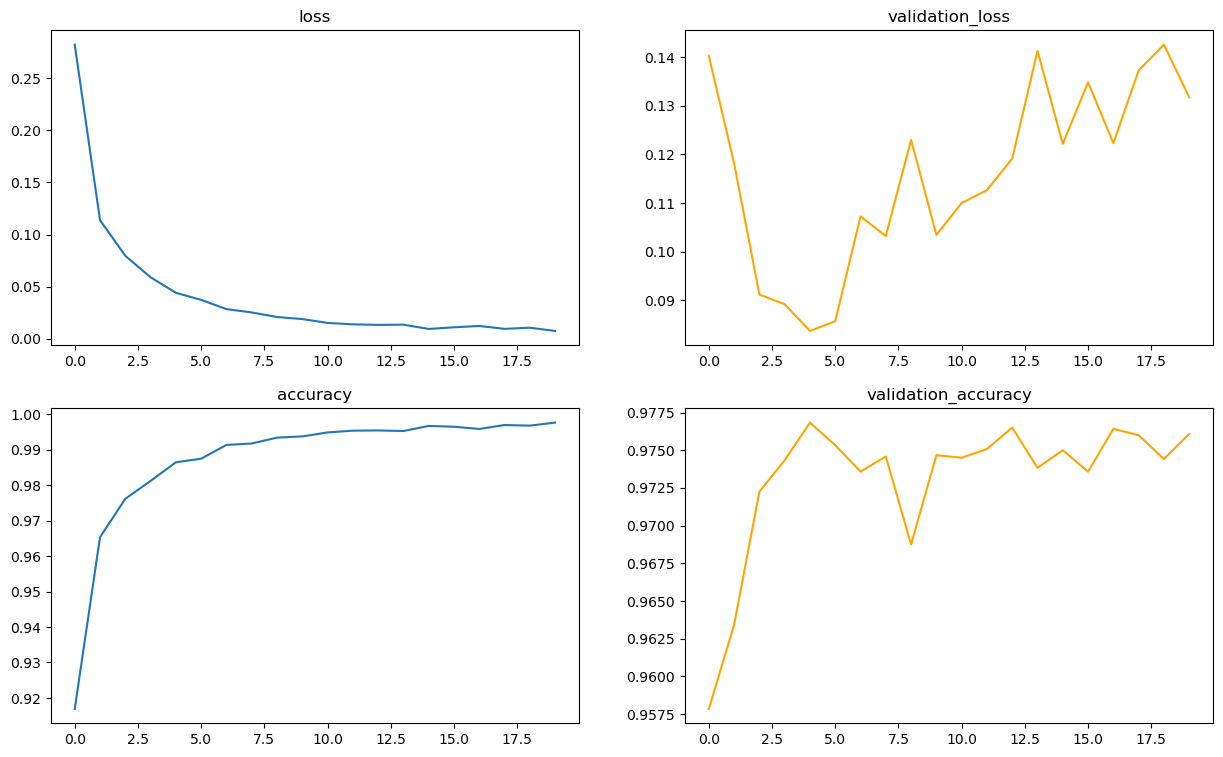

In [20]:
#check the graph of accurac, validation and loss
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
plt.title('loss')
plt.plot(history.history['loss'])
plt.subplot(2,2,2)
plt.title('validation_loss')
plt.plot(history.history['val_loss'],color='orange')
plt.subplot(2,2,3)
plt.title('accuracy')
plt.plot(history.history['accuracy'])
plt.subplot(2,2,4)
plt.title('validation_accuracy')
plt.plot(history.history['val_accuracy'],color='orange')


predict the  new image
-----------------------------------------------------------------------------------------------------------------------------

In [21]:
image = X_test[100]

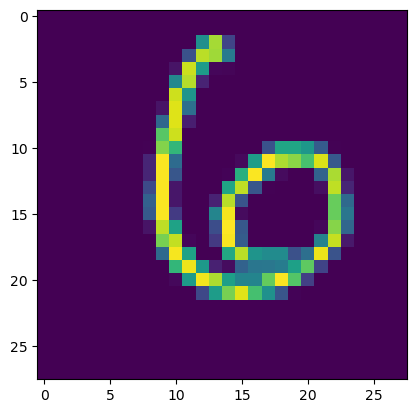

In [22]:
plt.imshow(image)

the above case directly will not work why because the image is 28x28  but the model expect the batch size ( the number of images to predict ) also. 

In [23]:
#check model input shape 
model.input_shape 

(None, 28, 28)

In [24]:
#reshape image to enter to model
image = image.reshape(1,28,28)  #here batch size =1 , because we send only one image to predict on

convert the image into normmalize by dividing it with max value if you have not done before
But as we are taking the image from the dataset to which we have already normalized earlier so no need to do that again 

In [25]:
#already normalized 
image.max()

np.float64(1.0)

In [26]:
#predict 
y_out = model.predict(image) #because it will give us probability for all the classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [27]:
final_pred = y_out.argmax(axis=1)
final_pred

array([6])

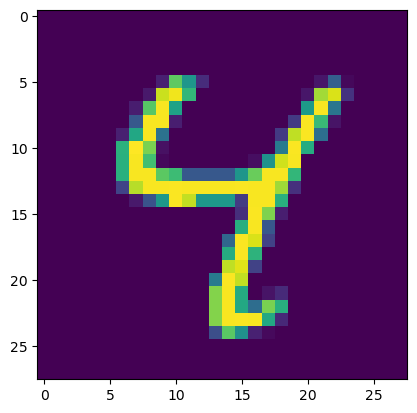

In [28]:
#or in single go 
plt.imshow(X_test[6])

In [29]:
#predict another
model.predict(X_test[6].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([4])

SAVE MODEL
-----------------------------------------------------------------------------------------------------------------------------

In [30]:
#save model 
model.save('handwritten_numeric_digits_classifier.h5')